A/B Testing Analysis for Marketing Campaign

(Subtitle) — Evaluating Facebook vs Instagram Conversions

Note: This project uses a synthetic dataset generated using ChatGPT for educational and demonstration purposes.

# Business Problem

As a marketing agency, our primary objective is to maximize the return on investment(ROI) for our clients' advertising campaigns. We have conducted two ad campaigns,one on Facebook and the other on Instagram, and we need to determine which platform yields better results in terms of clikcs, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Step1: Dataset Preparation

Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AB_Testing_Ad_Data_2025.csv')

In [ ]:
df.head()

,Date,FB_Impressions,FB_Clicks,FB_CTR,FB_Conversions,FB_Conv_Rate,FB_Spend,FB_Revenue,FB_ROAS,IG_Impressions,IG_Clicks,IG_CTR,IG_Conversions,IG_Conv_Rate,IG_Spend,IG_Revenue,IG_ROAS
0,2025-01-01,36902,396,0.0107,50,0.1263,195.21,635.88,3.26,29635,1645,0.0555,243,0.1477,110.68,3591.85,32.45
1,2025-01-02,14073,166,0.0118,37,0.2229,158.86,401.51,2.53,12768,835,0.0654,88,0.1054,84.15,1375.25,16.34
2,2025-01-03,13821,642,0.0465,121,0.1885,191.87,735.04,3.83,13429,383,0.0285,45,0.1175,128.88,505.58,3.92
3,2025-01-04,11123,233,0.0209,21,0.0901,186.48,367.57,1.97,8926,411,0.0460,72,0.1752,127.10,407.09,3.20
4,2025-01-05,12699,547,0.0431,59,0.1079,182.26,1325.02,7.27,8638,412,0.0477,115,0.2791,62.27,2243.09,36.02


## Dataset Discription

The dataset covers a Facebook Ad campaign and Instagram Ad campaign for a year. the dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Impressions:
How many times the ad was shown. Higher means better reach.

Clicks:
How many people clicked the ad, showing engagement.

CTR (Click-Through Rate):
Percentage of impressions that turned into clicks. Higher CTR means the ad is effective.

Conversions:
Number of people who completed the target action (e.g., signup or purchase).

Conversion Rate (CVR):
Percentage of clicks that turned into conversions. Shows how well the funnel works.

Spend:
The total amount spent on ads.

Revenue:
Money earned from the conversions.

ROAS (Return on Ad Spend):
How much revenue was earned for every ₹1 spent. Main metric to evaluate success.

# Step 2: Exploratory Data Analysis

In [ ]:
df.shape

(365, 17)

In [ ]:
df.dtypes

,0
Date,object
FB_Impressions,int64
FB_Clicks,int64
FB_CTR,float64
FB_Conversions,int64
FB_Conv_Rate,float64
FB_Spend,float64
FB_Revenue,float64
FB_ROAS,float64
IG_Impressions,int64


In [ ]:
# Convert Date datatype from object to datetime.
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,FB_Impressions,FB_Clicks,FB_CTR,FB_Conversions,FB_Conv_Rate,FB_Spend,FB_Revenue,FB_ROAS,IG_Impressions,IG_Clicks,IG_CTR,IG_Conversions,IG_Conv_Rate,IG_Spend,IG_Revenue,IG_ROAS
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2025-07-01 23:59:59.999999744,14279.800000,434.750685,0.030309,64.808219,0.150112,142.137616,948.434027,7.122329,11471.923288,490.060274,0.042472,90.309589,0.185550,118.657945,1484.125671,13.906822
min,2025-01-01 00:00:00,8481.000000,93.000000,0.010000,8.000000,0.046800,80.040000,48.430000,0.370000,6680.000000,118.000000,0.015100,12.000000,0.067800,60.620000,101.340000,0.570000
25%,2025-04-02 00:00:00,12734.000000,284.000000,0.020000,35.000000,0.100900,110.860000,442.690000,3.130000,10337.000000,327.000000,0.028500,51.000000,0.127900,88.420000,680.310000,5.770000
50%,2025-07-02 00:00:00,14451.000000,415.000000,0.030100,56.000000,0.149600,141.160000,711.970000,5.070000,11548.000000,453.000000,0.040700,79.000000,0.184200,116.040000,1185.570000,10.140000
75%,2025-10-01 00:00:00,15785.000000,561.000000,0.040200,88.000000,0.204300,175.210000,1243.900000,9.870000,12687.000000,640.000000,0.056000,116.000000,0.244400,150.530000,1922.040000,18.070000
max,2025-12-31 00:00:00,36902.000000,1659.000000,0.050000,319.000000,0.248700,199.980000,6380.600000,40.250000,29635.000000,1917.000000,0.069600,439.000000,0.298400,179.720000,12207.940000,189.980000
std,NaN,3166.218691,203.697904,0.011634,41.752692,0.058826,34.838398,760.940223,6.014643,2564.767463,229.034900,0.015743,53.151091,0.065841,34.742258,1183.882229,14.182224


## Distribution of clicks and conversion

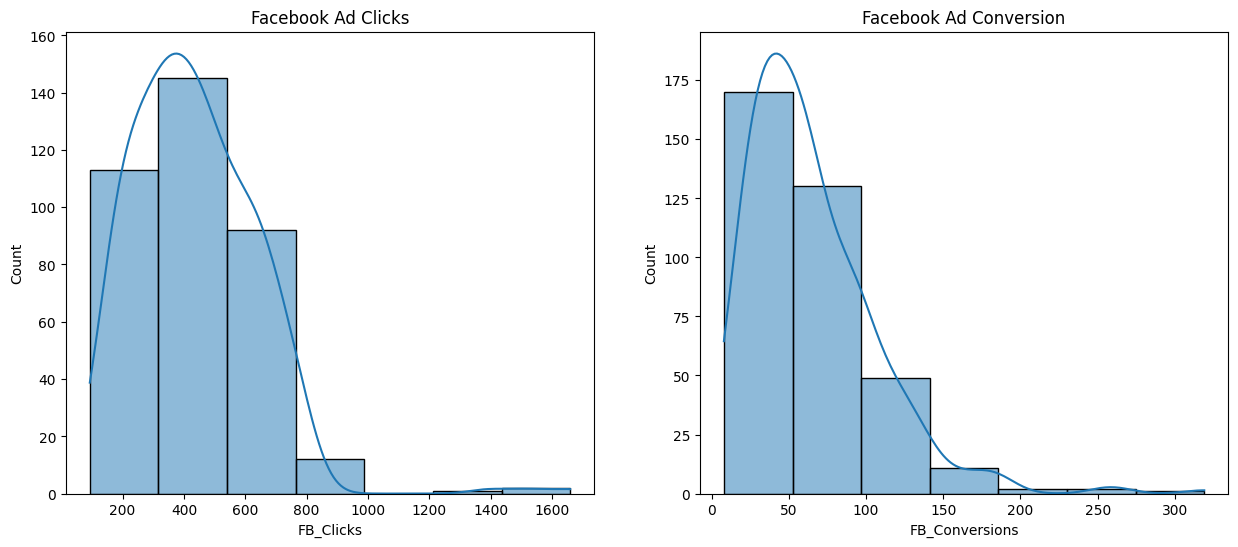

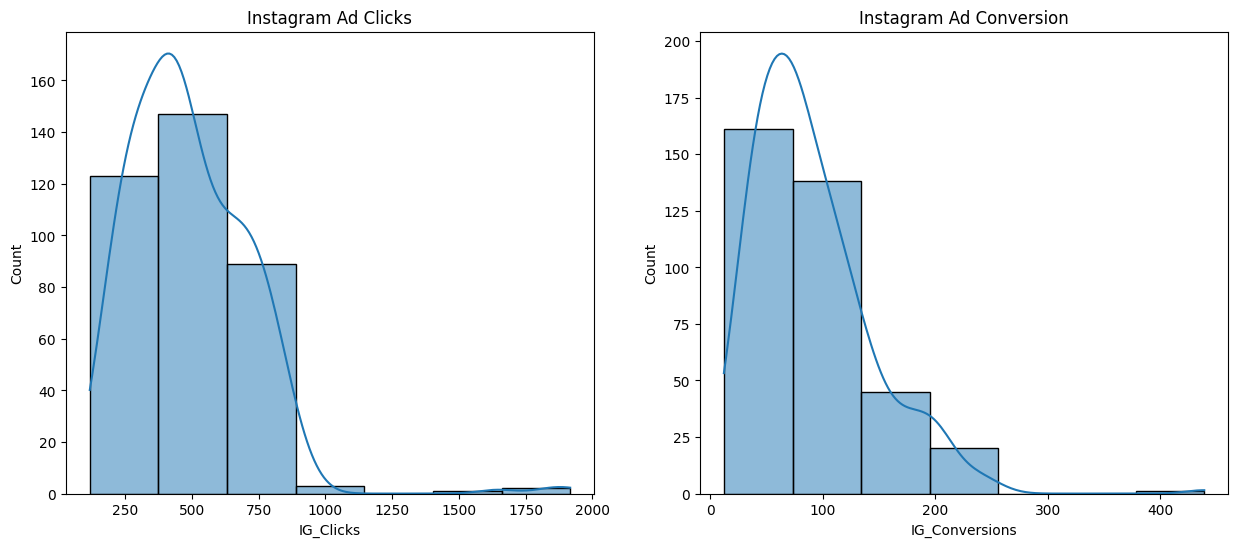

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['FB_Clicks'],bins = 7, edgecolor = 'black', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversion')
sns.histplot(df['FB_Conversions'],bins = 7, edgecolor = 'black',kde = True)

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Instagram Ad Clicks')
sns.histplot(df['IG_Clicks'],bins = 7, edgecolor= 'black',kde = True)
plt.subplot(1,2,2)
plt.title('Instagram Ad Conversion')
sns.histplot(df['IG_Conversions'],bins = 7, edgecolor = 'black',kde = True)
plt.savefig('compare_plot')

## Step 3: Comparison of Key Metrics

In [ ]:
# categorize the data in three three categories - holidays, weekends, weekdays
import holidays
india_holidays = holidays.India()

# define a function
def classifiy_day(date):
  if date in india_holidays:
    return "Holiday"
  elif date.weekday() >= 5:
    return "Weekend"
  else:
    return "weekday"
df['date_category'] = df['Date'].apply(classifiy_day)

In [ ]:
fB_IG_conversion = df.groupby('date_category')[['FB_Conversions','IG_Conversions']].sum().reset_index()
fB_IG_conversion

,date_category,FB_Conversions,IG_Conversions
0,Holiday,1420,1866
1,Weekend,4749,7165
2,weekday,17486,23932


In [ ]:
# Difference between conversion of both versions

fB_IG_conversion['Diff'] = (fB_IG_conversion['IG_Conversions'] - fB_IG_conversion['FB_Conversions'])/fB_IG_conversion['FB_Conversions']*100
fB_IG_conversion

,date_category,FB_Conversions,IG_Conversions,Diff
0,Holiday,1420,1866,31.408451
1,Weekend,4749,7165,50.873868
2,weekday,17486,23932,36.863777


<Figure size 800x500 with 0 Axes>

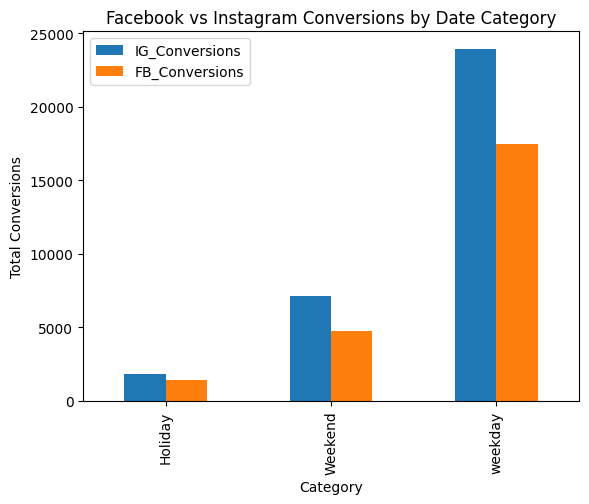

In [ ]:
plt.figure(figsize = (8,5))
ax = fB_IG_conversion.plot(
    x = 'date_category',
    y = ['IG_Conversions','FB_Conversions'],
    kind = 'bar'
)

plt.title("Facebook vs Instagram Conversions by Date Category")
plt.ylabel("Total Conversions")
plt.xlabel("Category")
plt.show()

The data suggests Instagram had more frequnt higher coversion days than Facebook.
there is significant variance in the number of high - conversion days between two different campaigns.

## Step 4: Behaviour and Relationship Check

### Check weather more clicks cause more conversion

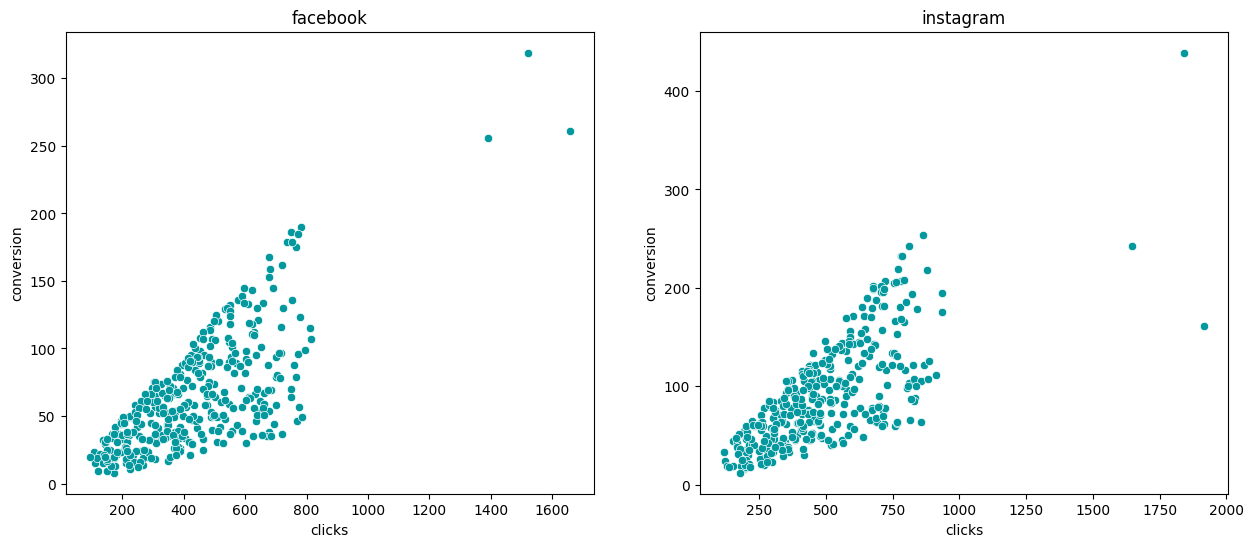

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('facebook')
sns.scatterplot(x = df['FB_Clicks'],y =df['FB_Conversions'],color = '#03989E')
plt.xlabel('clicks')
plt.ylabel('conversion')
plt.subplot(1,2,2)
plt.title('instagram')
sns.scatterplot(x = df['IG_Clicks'],y =df['IG_Conversions'],color = '#03989E')
plt.xlabel('clicks')
plt.ylabel('conversion')
plt.show()

Find Correlation between clicks and conversion

In [ ]:
Facebook_corr = df[['FB_Clicks','FB_Conversions']].corr()
Instagram_corr = df[['IG_Clicks','IG_Conversions']].corr()

print('facebook :',round(Facebook_corr.values[0,1],2))
print('Instagram :',round(Instagram_corr.values[0,1],2))

facebook : 0.74
Instagram : 0.73


Based on Corr between clicks and conversion, both are looking near about similar, in this condition we can decide which one is performing best
so we will move towards hypothesis testing

Note: Correlation does NOT measure volume or cost-effectiveness — only the strength of relationship.

# Step 5: Statistical(Hypothesis) Testing



Hypothesis: Advertising on Instagram will result in greater number of conversion compared to Facebook conversion
- H0: There is no difference in number of conversion of Instagram and Facebook
- Null Hypothesis(H0)​:μIG​=μFB
- Alternat Hypothesis(H1):The number of conversion from Instagram is greater than the number of coversion of facebook.
- H1:μIG​>μFB​

In [ ]:
print('Mean Convrsion \n------------------')
print('facebook :',round(df['FB_Conversions'].mean(),2))
print('Instagram :',round(df['IG_Conversions'].mean(),2))


from scipy.stats import ttest_ind
t_stat,p_value = ttest_ind(df['IG_Conversions'],df['FB_Conversions'],equal_var = False)
print('T_static :',round(t_stat,2))
print('P_value :',round(p_value,4))


Mean Convrsion 
------------------
facebook : 64.81
Instagram : 90.31
T_static : 7.21
P_value : 0.0


Based on Mean Of Conversion Instagram is generating ~39% more conversions per day than Facebook.

Since the p-value is < 0.05 (in fact, ~0), the result is highly statistically significant.

Based on the t-test results, we reject the null hypothesis.

There is a statistically significant difference in conversions between Facebook and Instagram, with Instagram performing substantially better.

In [ ]:
# With mannwhitneyU test
from scipy.stats import mannwhitneyu

stats,p = mannwhitneyu(df['IG_Conversions'],df['FB_Conversions'],alternative = 'greater')
print('Static :',round(stats,2))
print('P_value :',round(p,8))

Static : 87567.5
P_value : 0.0


results are consistent: IG_Conversions and FB_Conversions are significantly different.


## Step 6: Insights and Recommendation

Instagram clearly outperforms Facebook in terms of conversions. The difference in mean conversions is substantial (90.31 vs. 64.81), and both statistical tests support that this gap is highly significant. Since the p-value is effectively zero, the results are unlikely due to chance.

Based on the findings, Instagram should be prioritized for future campaigns, as it delivers better conversion performance. Facebook can still be part of the strategy, but it may require adjustments in targeting, creative, or budget allocation to improve outcomes.